In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import networkx as nx
import pandas as pd

In [6]:
prod_struct = pd.read_excel('TASE_Setup.xlsx',sheet_name='ProductStructure')
V = list(set(list(prod_struct.upstream.unique())+list(prod_struct.downstream.unique())))
flow_arcs = list(zip(prod_struct.upstream, prod_struct.downstream))

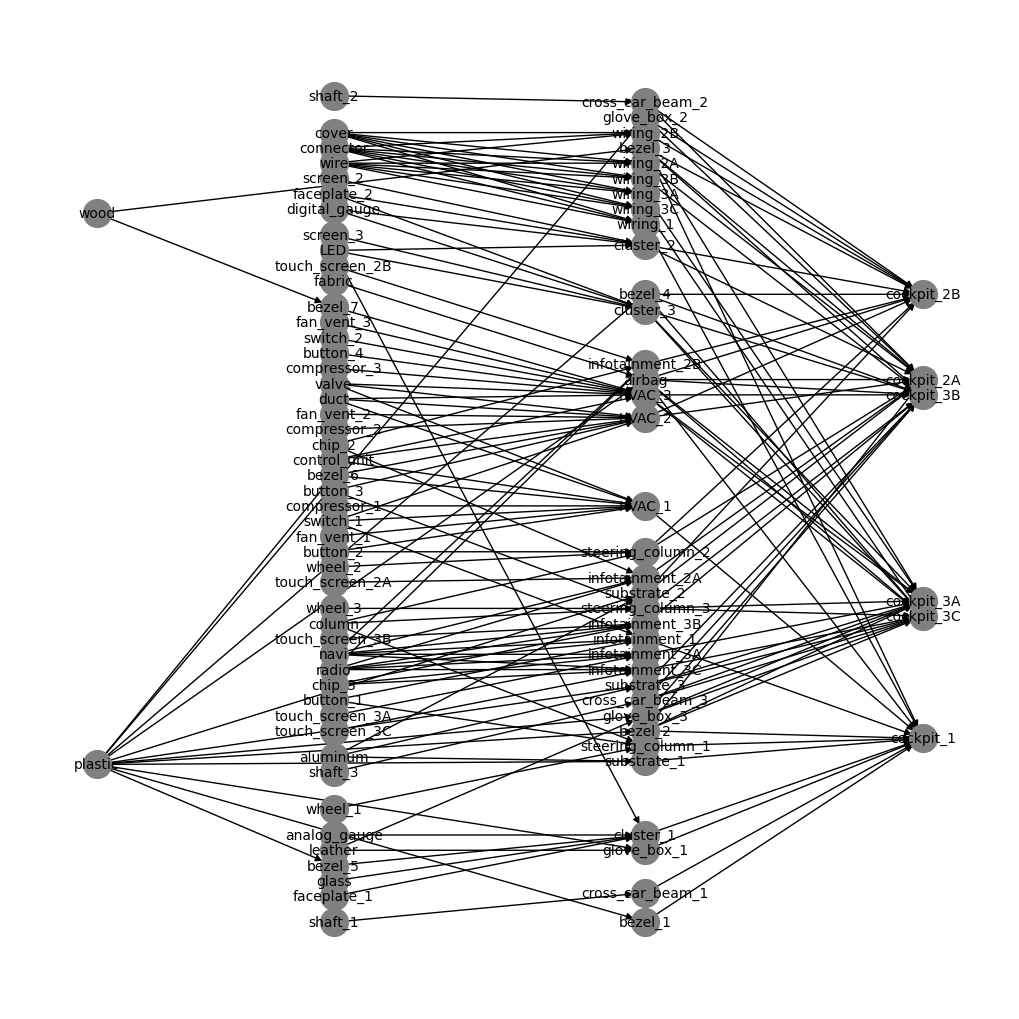

In [7]:
G = nx.DiGraph(rankdir='LR',seed=2)
G.add_nodes_from(V)
G.add_edges_from(flow_arcs)
plt.figure(figsize=(10,10) )
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G, pos,node_size=400,width=1,with_labels=True,
                            node_color='gray',
                            font_size=10,
                            font_color='k',
                            edge_color='white',
                            arrows=False)
    #Adding first flows
nx.draw_networkx_edges(
        G,
        pos,
        edgelist=flow_arcs,
        alpha=1,
        #width=flow_arcs_number_1,
        #edge_color=flow_arcs_color_1,
        connectionstyle='arc3',
        #style=flow_arcs_style_1
        #'arc3,rad=0.2'
        )
#plt.savefig(f'TASE_ProductStruct.pdf',bbox_inches='tight')
plt.show()

In [9]:
SC = pd.read_excel('TASE_Setup.xlsx',sheet_name='Link')[['Source','Destination']]

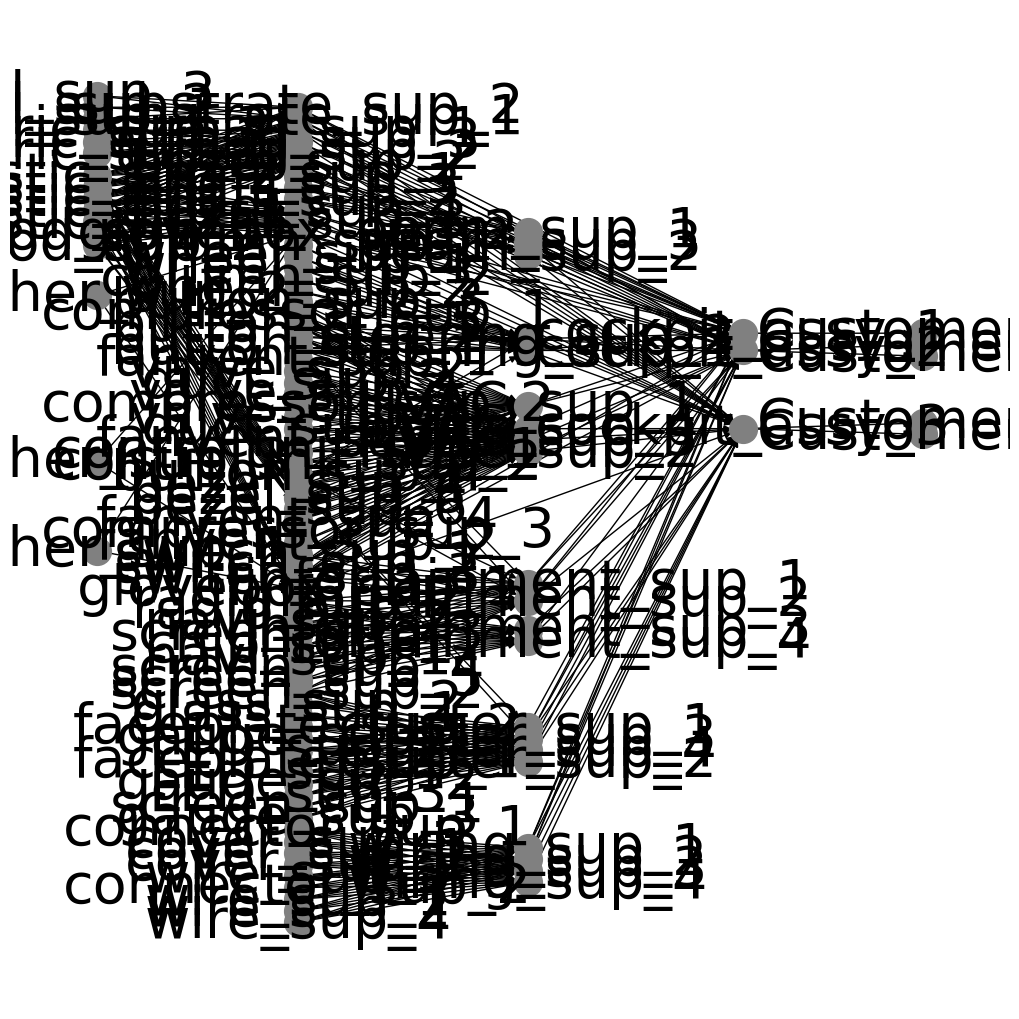

In [12]:
V = list(set(list(SC.Source.unique())+list(SC.Destination.unique())))
flow_arcs = list(zip(SC.Source, SC.Destination))
G = nx.DiGraph(rankdir='LR',seed=2)
G.add_nodes_from(V)
G.add_edges_from(flow_arcs)
plt.figure(figsize=(10,10) )
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G, pos,node_size=400,width=1,with_labels=True,
                            node_color='gray',
                            font_size=40,
                            font_color='k',
                            edge_color='white',
                            arrows=False)
    #Adding first flows
nx.draw_networkx_edges(
        G,
        pos,
        edgelist=flow_arcs,
        alpha=1,
        #width=flow_arcs_number_1,
        #edge_color=flow_arcs_color_1,
        connectionstyle='arc3',
        #style=flow_arcs_style_1
        #'arc3,rad=0.2'
        )
#plt.savefig(f'TASE_SCLayout.pdf',bbox_inches='tight')
plt.show()

In [3]:
SC = pd.read_excel('TASE_Setup.xlsx',sheet_name='Link')[['Source','Destination']]
V = list(set(list(SC.Source.unique())+list(SC.Destination.unique())))
#Checking for entities that are Part vs Manuf (Considering that we have no distributors in this instance)
downstream = {}
upstream = {}
for v in V:
    downstream[v] = []
    upstream[v] = []
for _,r in SC.iterrows():
    source = r['Source']
    destination = r['Destination']
    downstream[source].append(destination)

    upstream[destination].append(source)
AgentType = {}
parts = []#Agents that qualify as parts (they start the SC)
for idx,upstream_ents in upstream.items():
    if len(upstream_ents) == 0:
        parts.append(idx)
for v in V:
    if v in parts:
        AgentType[v] = 'Part'
    else:
        AgentType[v] = 'Manuf'
Market = pd.read_excel('DataInstances/TASE_Setup.xlsx',sheet_name='Market')
Market['AgentType'] = Market['AgentName'].map(AgentType)

In [5]:
AgentType = {}
parts = []#Agents that qualify as parts (they start the SC)
for idx,upstream_ents in upstream.items():
    if len(upstream_ents) == 0:
        parts.append(idx)
for v in V:
    if v in parts:
        AgentType[v] = 'Part'
    else:
        AgentType[v] = 'Manuf'

In [30]:
Market = pd.read_excel('DataInstances/TASE_Setup.xlsx',sheet_name='Market')

In [32]:
Market['AgentType'] = Market['AgentName'].map(AgentType)

In [35]:
Market.to_excel('ClassifiedAgents.xlsx')